In [626]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#import matplotlib.dates as mdates

In [627]:
constructors_stadings = pd.read_csv('./data_files/constructor_standings.csv')
constructors = pd.read_csv('./data_files/constructors.csv')
races = pd.read_csv('./data_files/races.csv')

## Races data Cleaning

In [628]:
races.drop(columns='url', inplace=True)

##### Final Race index for each year 

In [629]:
race_indexs = races['year'].drop_duplicates(keep='last').reset_index()
race_indexs

,index,year
0,16,2009
1,34,2008
2,51,2007
3,69,2006
4,88,2005
...,...,...
68,996,2018
69,1017,2019
70,1034,2020
71,1057,2021


last race for each year

In [630]:
races = races.iloc[race_indexs['index']]
races

,raceId,year,round,circuitId,name,date,time
16,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00
34,35,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00
51,52,2007,17,18,Brazilian Grand Prix,2007-10-21,16:00:00
69,70,2006,18,18,Brazilian Grand Prix,2006-10-22,14:00:00
88,89,2005,19,17,Chinese Grand Prix,2005-10-16,14:00:00
...,...,...,...,...,...,...,...
996,1009,2018,21,24,Abu Dhabi Grand Prix,2018-11-25,13:10:00
1017,1030,2019,21,24,Abu Dhabi Grand Prix,2019-12-01,13:10:00
1034,1047,2020,17,24,Abu Dhabi Grand Prix,2020-12-13,13:10:00
1057,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00


Gathering only the last 10-11 years 2010 - 2021

In [631]:
races = races[races['year'] >= 2010][:-1]
races

,raceId,year,round,circuitId,name,date,time
354,355,2010,19,24,Abu Dhabi Grand Prix,2010-11-14,13:00:00
857,859,2011,19,18,Brazilian Grand Prix,2011-11-27,16:00:00
877,879,2012,20,18,Brazilian Grand Prix,2012-11-25,16:00:00
896,899,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00
915,918,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,13:00:00
934,945,2015,19,24,Abu Dhabi Grand Prix,2015-11-29,13:00:00
955,968,2016,21,24,Abu Dhabi Grand Prix,2016-11-27,13:00:00
975,988,2017,20,24,Abu Dhabi Grand Prix,2017-11-26,13:00:00
996,1009,2018,21,24,Abu Dhabi Grand Prix,2018-11-25,13:10:00
1017,1030,2019,21,24,Abu Dhabi Grand Prix,2019-12-01,13:10:00


In [632]:
raceId_years = races.drop(columns=['round','circuitId','name','date','time'])
raceId_years.set_index('raceId', inplace=True)

In [633]:
raceId_years_dict = raceId_years.to_dict('dict')
raceId_years_dict['year']

{355: 2010,
 859: 2011,
 879: 2012,
 899: 2013,
 918: 2014,
 945: 2015,
 968: 2016,
 988: 2017,
 1009: 2018,
 1030: 2019,
 1047: 2020,
 1073: 2021}

### Constructors standings cleaning

gets only the standings based on the final races in races DataFrame

In [634]:
constructors_stadings = constructors_stadings[constructors_stadings['raceId'].isin(races['raceId'])]
constructors_stadings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
10343,24496,355,6,396.0,3,3,5
10344,24497,355,1,454.0,2,2,5
10345,24498,355,9,498.0,1,1,9
10346,24499,355,131,214.0,4,4,0
10347,24500,355,10,68.0,7,7,0
...,...,...,...,...,...,...,...
12701,27928,1073,117,77.0,7,7,0
12702,27929,1073,51,13.0,9,9,0
12703,27930,1073,214,155.0,5,5,1
12704,27931,1073,3,23.0,8,8,0


### Constructors cleaning

In [635]:
constructors.drop(columns=['url', 'nationality', 'constructorRef'], inplace=True)

In [636]:
constructors.set_index("constructorId", inplace=True)
constructors

,name
constructorId,
1,McLaren
2,BMW Sauber
3,Williams
4,Renault
5,Toro Rosso
...,...
209,Manor Marussia
210,Haas F1 Team
211,Racing Point


In [637]:
constructors_dict = constructors.to_dict('dict')
constructors_dict['name']

{1: 'McLaren',
 2: 'BMW Sauber',
 3: 'Williams',
 4: 'Renault',
 5: 'Toro Rosso',
 6: 'Ferrari',
 7: 'Toyota',
 8: 'Super Aguri',
 9: 'Red Bull',
 10: 'Force India',
 11: 'Honda',
 12: 'Spyker',
 13: 'MF1',
 14: 'Spyker MF1',
 15: 'Sauber',
 16: 'BAR',
 17: 'Jordan',
 18: 'Minardi',
 19: 'Jaguar',
 20: 'Prost',
 21: 'Arrows',
 22: 'Benetton',
 23: 'Brawn',
 24: 'Stewart',
 25: 'Tyrrell',
 26: 'Lola',
 27: 'Ligier',
 28: 'Forti',
 29: 'Footwork',
 30: 'Pacific',
 31: 'Simtek',
 32: 'Team Lotus',
 33: 'Larrousse',
 34: 'Brabham',
 35: 'Dallara',
 36: 'Fondmetal',
 37: 'March',
 38: 'Andrea Moda',
 39: 'AGS',
 40: 'Lambo',
 41: 'Leyton House',
 42: 'Coloni',
 44: 'Euro Brun',
 45: 'Osella',
 46: 'Onyx',
 47: 'Life',
 48: 'Rial',
 49: 'Zakspeed',
 50: 'RAM',
 51: 'Alfa Romeo',
 52: 'Spirit',
 53: 'Toleman',
 54: 'ATS',
 55: 'Theodore',
 56: 'Fittipaldi',
 57: 'Ensign',
 58: 'Shadow',
 59: 'Wolf',
 60: 'Merzario',
 61: 'Kauhsen',
 62: 'Rebaque',
 63: 'Surtees',
 64: 'Hesketh',
 65: 'Martini

###### Replacing all the construcorIds with the team names

In [638]:
constructors_stadings_teams = constructors_stadings['constructorId'].replace(constructors_dict['name'])

###### Making new column to keep the constructorId as well as the team names

In [639]:
constructors_stadings['Team Name'] = constructors_stadings_teams

In [640]:
constructors_stadings.sort_values('constructorId')

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team Name
10809,25123,879,1,378.0,3,3,7,McLaren
11460,26433,945,1,27.0,9,9,0,McLaren
11024,25349,899,1,122.0,5,5,0,McLaren
11694,26730,968,1,76.0,6,6,0,McLaren
11894,26931,988,1,30.0,9,9,0,McLaren
...,...,...,...,...,...,...,...,...
12479,27656,1047,211,195.0,4,4,1,Racing Point
12312,27459,1030,211,73.0,7,7,0,Racing Point
12480,27657,1047,213,107.0,7,7,1,AlphaTauri
12700,27927,1073,213,142.0,6,6,0,AlphaTauri


In [641]:
constructors_stadings['Team Name'].unique()

array(['Ferrari', 'McLaren', 'Red Bull', 'Mercedes', 'Force India',
       'Williams', 'Renault', 'Toro Rosso', 'Lotus', 'Sauber', 'HRT',
       'Virgin', 'Lotus F1', 'Marussia', 'Caterham', 'Manor Marussia',
       'Haas F1 Team', 'Alfa Romeo', 'Racing Point', 'AlphaTauri',
       'Aston Martin', 'Alpine F1 Team'], dtype=object)

 Fixing teams that are ran by the same company however have changed names throughout the years

In [642]:
changed_team_names = {
    'Racing Point' :'Aston Martin',
    'Force India'  :'Aston Martin',
    'Alpine F1 Team' : 'Alpine',
    'Renault' : 'Alpine',
    'Lotus' : 'Caterham',
    'Lotus F1' : 'Caterham',
    'Toro Rosso' : 'AlphaTauri',
    'Sauber' :'Alfa Romeo',
    'Marussia' :'Manor Marussia',
    'Virgin' : 'Manor Marussia',
    'Haas F1 Team' : 'Haas'
}
constructors_stadings['Team Name'].replace(changed_team_names, inplace=True)
constructors_stadings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team Name
10343,24496,355,6,396.0,3,3,5,Ferrari
10344,24497,355,1,454.0,2,2,5,McLaren
10345,24498,355,9,498.0,1,1,9,Red Bull
10346,24499,355,131,214.0,4,4,0,Mercedes
10347,24500,355,10,68.0,7,7,0,Aston Martin
...,...,...,...,...,...,...,...,...
12701,27928,1073,117,77.0,7,7,0,Aston Martin
12702,27929,1073,51,13.0,9,9,0,Alfa Romeo
12703,27930,1073,214,155.0,5,5,1,Alpine
12704,27931,1073,3,23.0,8,8,0,Williams


In [643]:
constructors_stadings_years = constructors_stadings['raceId'].replace(raceId_years_dict['year'])
constructors_stadings['year'] = constructors_stadings_years

In [644]:
constructors_stadings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team Name,year
10343,24496,355,6,396.0,3,3,5,Ferrari,2010
10344,24497,355,1,454.0,2,2,5,McLaren,2010
10345,24498,355,9,498.0,1,1,9,Red Bull,2010
10346,24499,355,131,214.0,4,4,0,Mercedes,2010
10347,24500,355,10,68.0,7,7,0,Aston Martin,2010
...,...,...,...,...,...,...,...,...,...
12701,27928,1073,117,77.0,7,7,0,Aston Martin,2021
12702,27929,1073,51,13.0,9,9,0,Alfa Romeo,2021
12703,27930,1073,214,155.0,5,5,1,Alpine,2021
12704,27931,1073,3,23.0,8,8,0,Williams,2021


In [645]:
current_teams = ['Ferrari','McLaren','Red Bull','Mercedes','Aston Martin','Williams','Alpine','AlphaTauri','Alfa Romeo','Haas']
constructors_stadings = constructors_stadings[constructors_stadings['Team Name'].isin(current_teams)]

In [646]:
constructors_stadings[constructors_stadings['Team Name'] =='Haas']

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Team Name,year
11690,26726,968,210,29.0,8,8,0,Haas,2016
11895,26932,988,210,47.0,8,8,0,Haas,2017
12105,27182,1009,210,93.0,5,5,0,Haas,2018
12309,27456,1030,210,28.0,9,9,0,Haas,2019
12485,27662,1047,210,3.0,9,9,0,Haas,2020
12705,27932,1073,210,0.0,10,10,0,Haas,2021


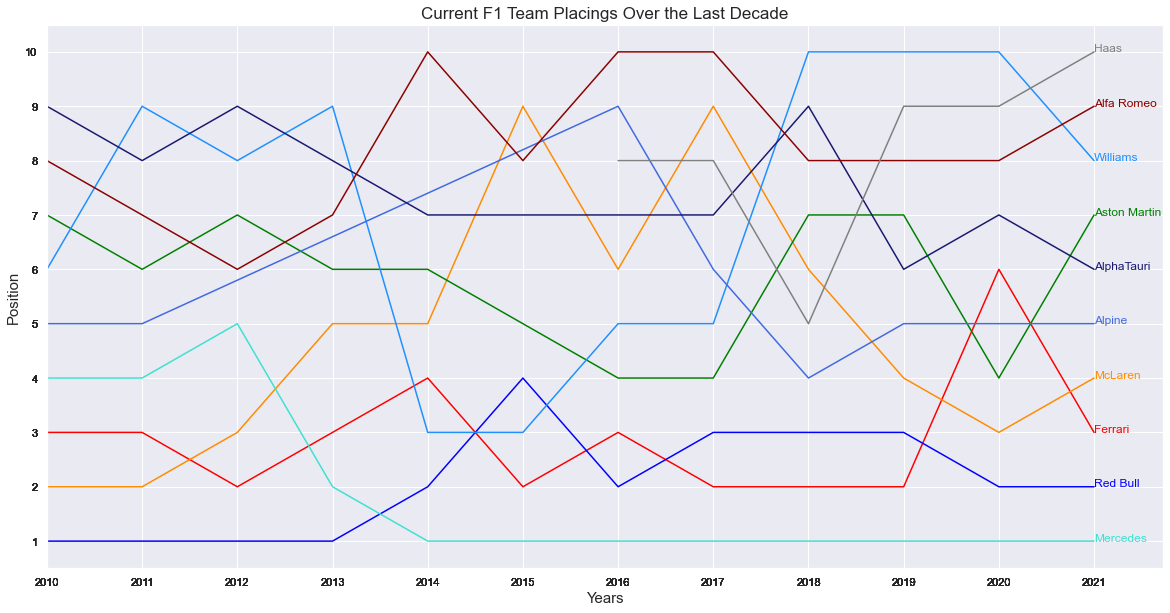

In [684]:
team_colors = ['Red', 'darkorange', 'Blue', 'Turquoise', 'Green', 'dodgerblue', 'royalBlue', 'midnightblue', 'DarkRed','grey']
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="darkgrid")
sns.lineplot(ax=ax, data= constructors_stadings, x='year', y='position',hue = 'Team Name',palette=team_colors,ci=None)
plt.ylim(0.5,10.5)
plt.xlim(2010)
plt.yticks(constructors_stadings['position'],weight='normal')
plt.xticks(constructors_stadings['year'],weight='normal')
ax.get_legend().remove()
plt.xlabel('Years', fontsize=15)
plt.ylabel('Position', fontsize=15)
plt.title('Current F1 Constructors Placings Over the Last Decade', fontsize=17)
for line, name in zip(ax.lines, current_teams):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
		y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
		continue     
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0,0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 2.3)
